___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

##### Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

#### Explore Data

You can rename columns to more usable, if you need.

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace=True)

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.shape

(200, 5)

In [11]:
df.isnull().any().sum()

0

In [12]:
df.duplicated().sum()

0

In [13]:
df.nunique()

CustomerID        200
Gender              2
Age                51
Annual Income      64
Spending Score     84
dtype: int64

In [14]:
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000,200.000,200.000,200.000
mean,100.500,38.850,60.560,50.200
std,57.879,13.969,26.265,25.824
min,1.000,18.000,15.000,1.000
25%,50.750,28.750,41.500,34.750
50%,100.500,36.000,61.500,50.000
75%,150.250,49.000,78.000,73.000
max,200.000,70.000,137.000,99.000


In [15]:
df.drop("CustomerID", inplace=True, axis=1)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





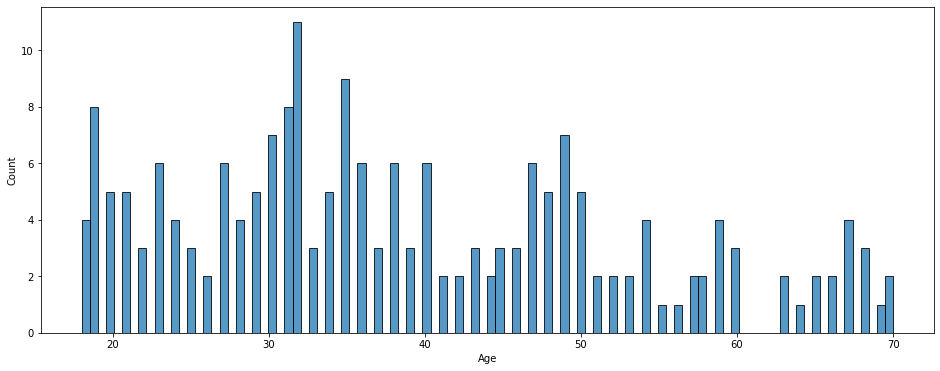

In [16]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x="Age",bins=100);

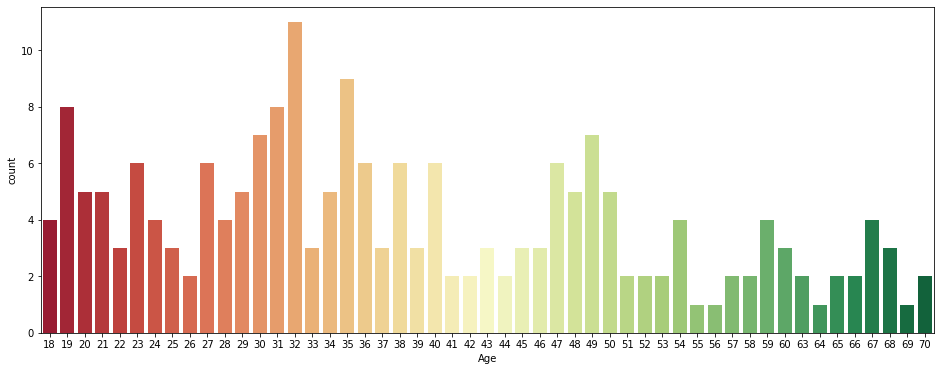

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(x ='Age', data = df,palette="RdYlGn")
plt.show();

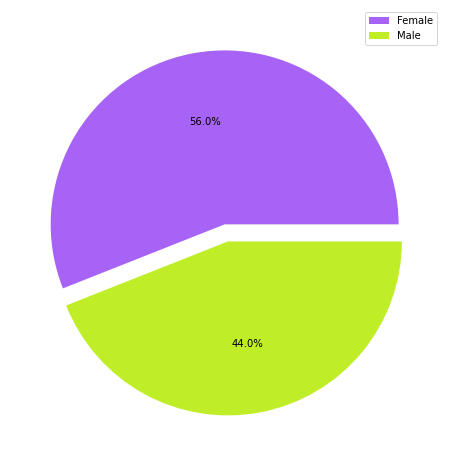

In [18]:
import random
n = 40
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]

plt.figure(figsize=(10,8))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f%%', colors=color);
plt.legend(labels=['Female','Male']);

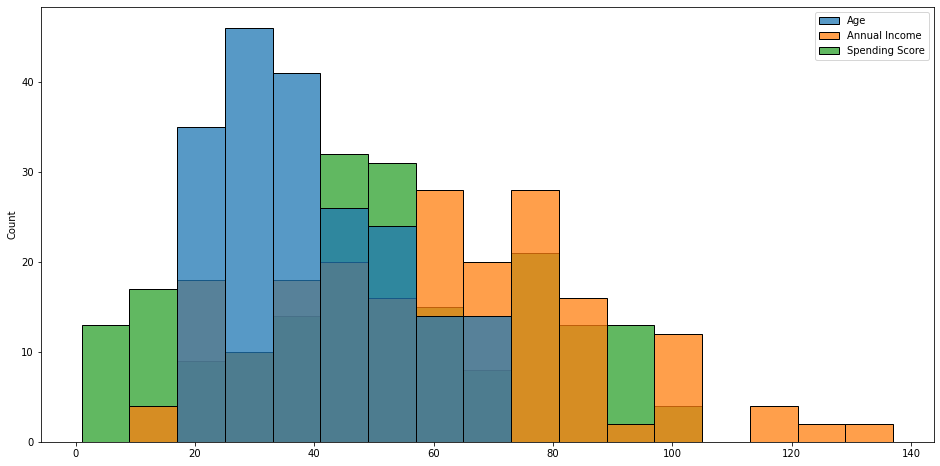

In [19]:
plt.figure(figsize=(16,8))
sns.histplot(data=df);

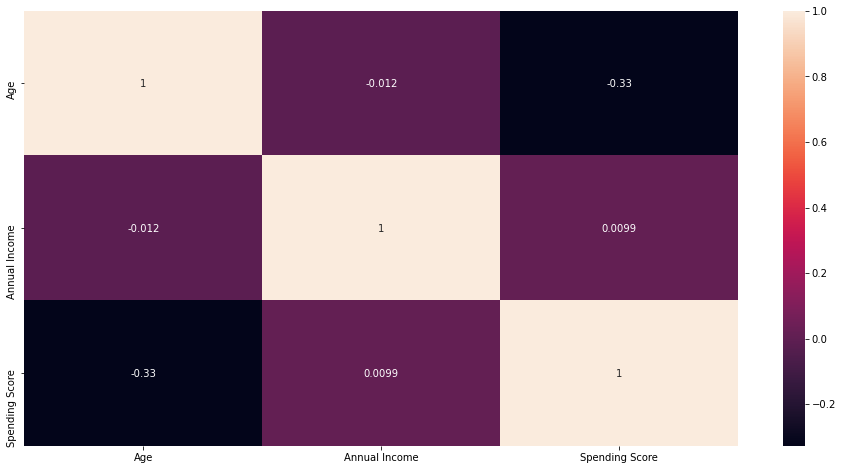

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show();

Text(0, 0.5, 'Count')

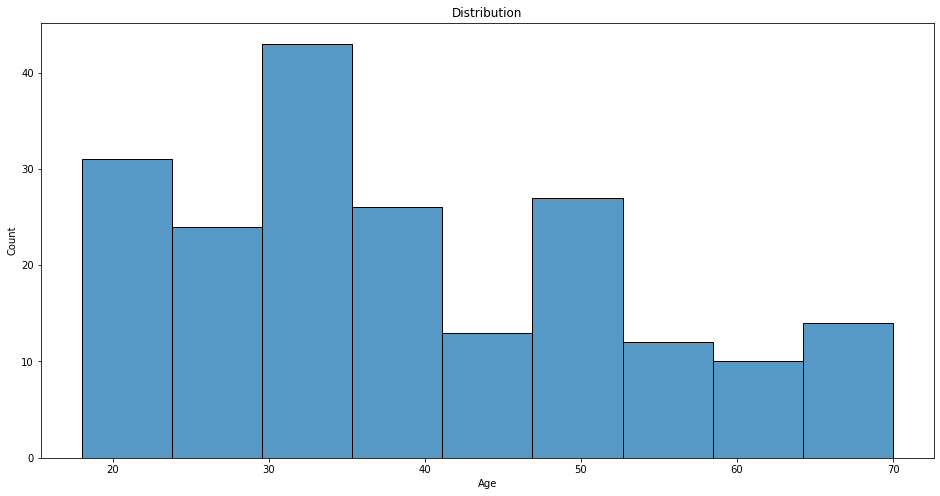

In [21]:
plt.figure(figsize=(16,8))
sns.histplot(x='Age', data=df)
plt.title('Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

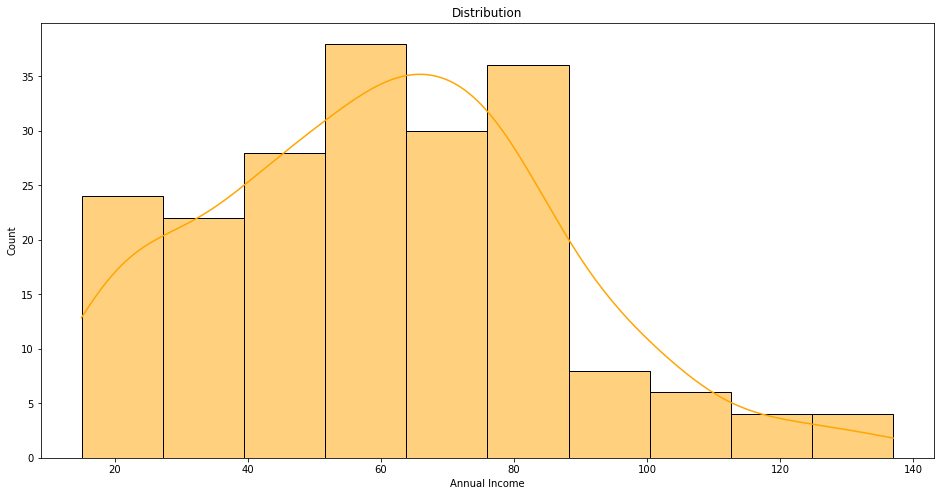

In [22]:
plt.figure(figsize=(16,8))
sns.histplot(x ='Annual Income', data=df, color='ORANGE', kde = True)
plt.title('Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

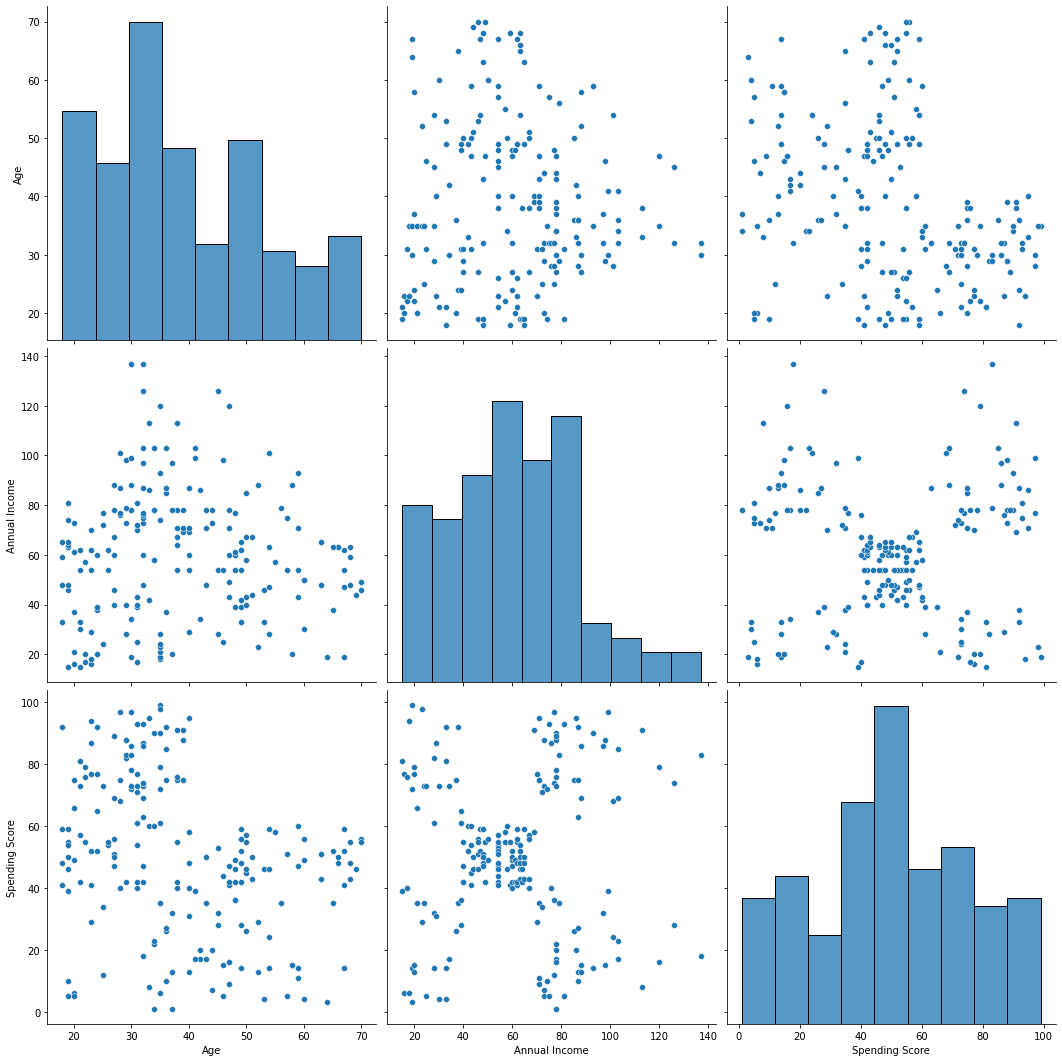

In [23]:
sns.pairplot(df, size=5);

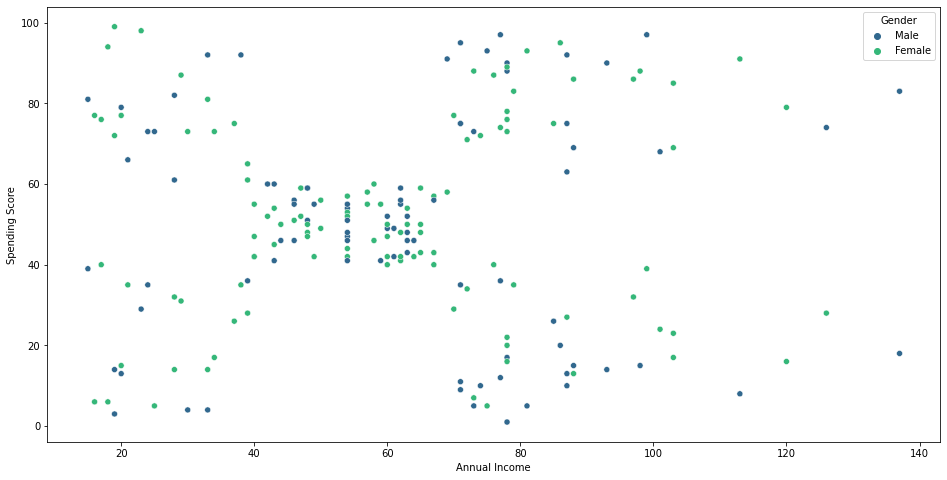

In [24]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual Income', y='Spending Score', data=df, hue = "Gender",palette="viridis")
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [25]:
from pyclustertend import hopkins

In [26]:
X1 = df[["Age","Spending Score"]]

In [27]:
X1.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [28]:
hopkins(X1, X1.shape[0])

0.29698023658772144

In [29]:
X2 = df[["Annual Income","Spending Score"]]

In [30]:
X2.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [31]:
hopkins(X2, X2.shape[0])

0.2901689479576096

#### *ii. Determine optimal number of clusters*

In [32]:
from sklearn.cluster import KMeans

In [33]:
ssd = []

K = range(2,10)                                           

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)                                          
    ssd.append(model.inertia_)

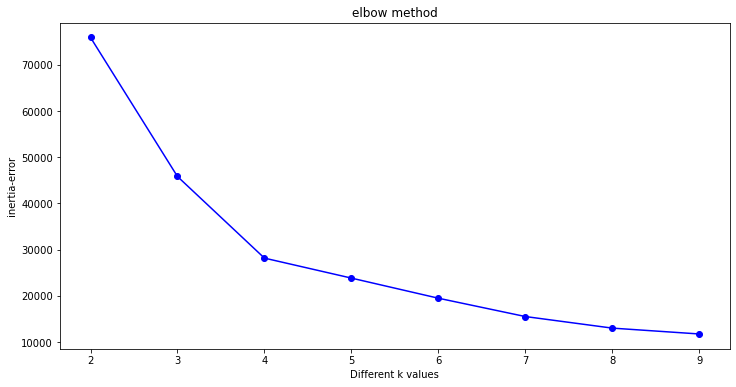

In [34]:
plt.figure(figsize=(12,6))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [35]:
ssd

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23838.24882164619,
 19483.1179104427,
 15514.193134351031,
 13006.483628851023,
 11738.020296954506]

In [36]:
pd.Series(ssd).diff()

0          NaN
1   -30108.479
2   -17675.093
3    -4327.335
4    -4355.131
5    -3968.925
6    -2507.710
7    -1268.463
dtype: float64

In [37]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.479
3,17675.093
4,4327.335
5,4355.131
6,3968.925
7,2507.710
8,1268.463


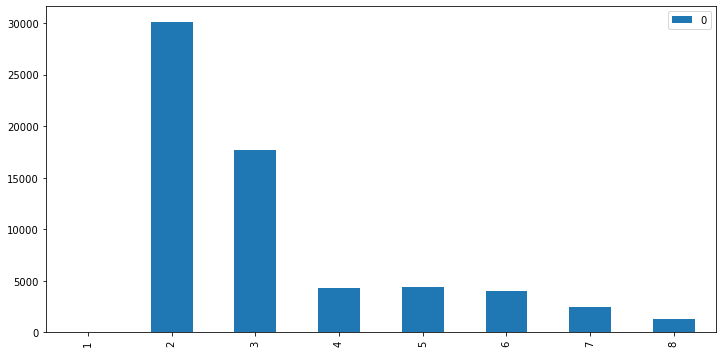

In [38]:
df_diff.plot(kind='bar',figsize=(12,6));

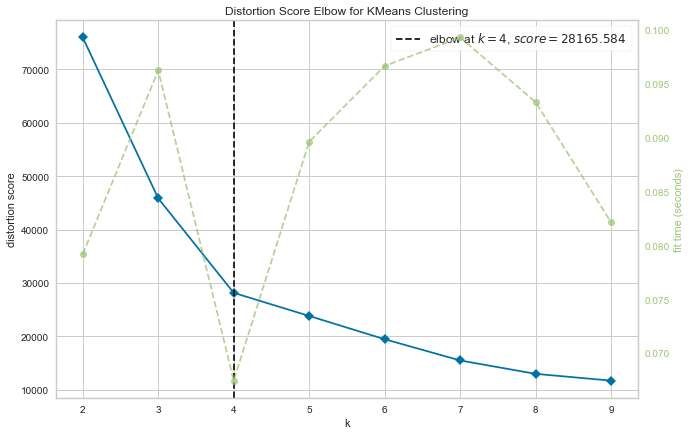

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10),size=(750,500))
visu.fit(X1)
visu.poof()

In [40]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


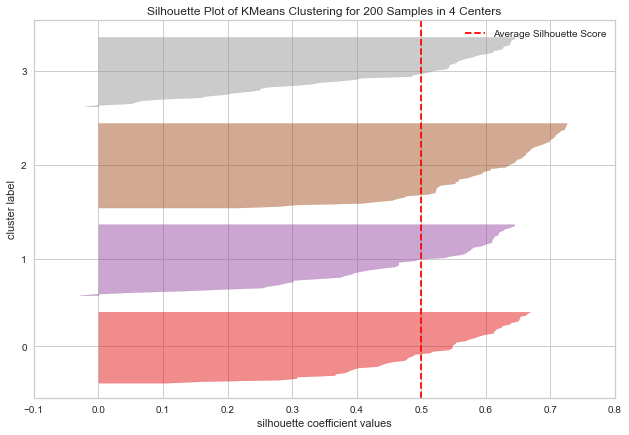

In [41]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3, size=(750,500))

visualizer.fit(X1)     
visualizer.poof();

### Why silhouette_score is negative?

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

In [42]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [43]:
kmeans.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [44]:
X1["cluster_Kmeans"] = kmeans.fit_predict(X1)

In [45]:
X1

,Age,Spending Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


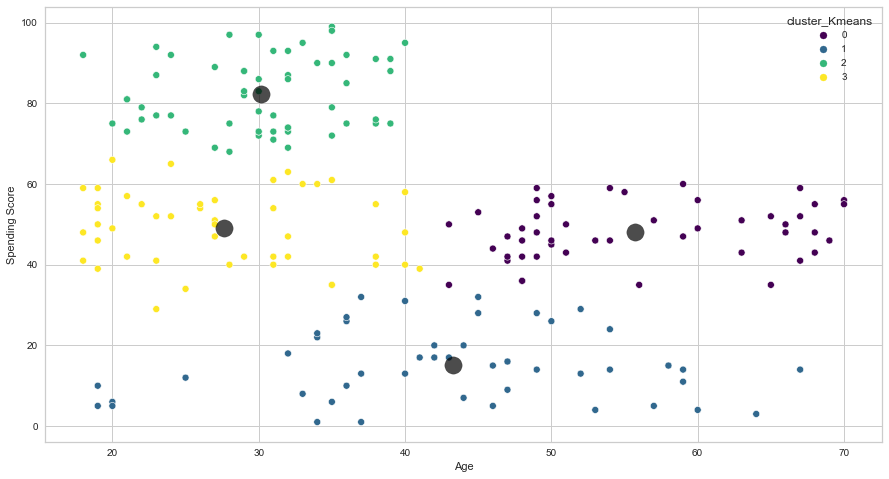

In [46]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending Score', hue='cluster_Kmeans', data=X1, palette="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [47]:
X2=df[["Annual Income","Spending Score"]]

In [48]:
X2.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [49]:
hopkins(X2,X2.shape[0])

0.29893274938897574

#### *ii. Determine optimal number of clusters*

In [50]:
ssd = []

K = range(2,10)                                          # k icin aralik.

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)                                         # Her yeni k sayisina gore modeli egit.
    ssd.append(model.inertia_)

In [51]:
ssd

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21850.165282585633]

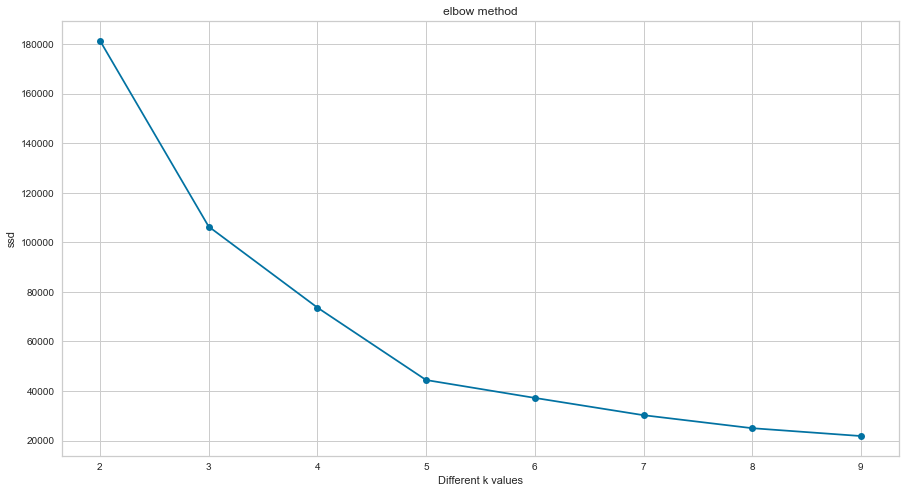

In [52]:
plt.figure(figsize=(15,8))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("elbow method") ;

In [53]:
pd.Series(ssd).diff()

0          NaN
1   -75015.223
2   -32668.584
3   -29231.334
4    -7214.641
5    -6974.157
6    -5247.818
7    -3161.674
dtype: float64

In [54]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.223
3,32668.584
4,29231.334
5,7214.641
6,6974.157
7,5247.818
8,3161.674


<AxesSubplot:>

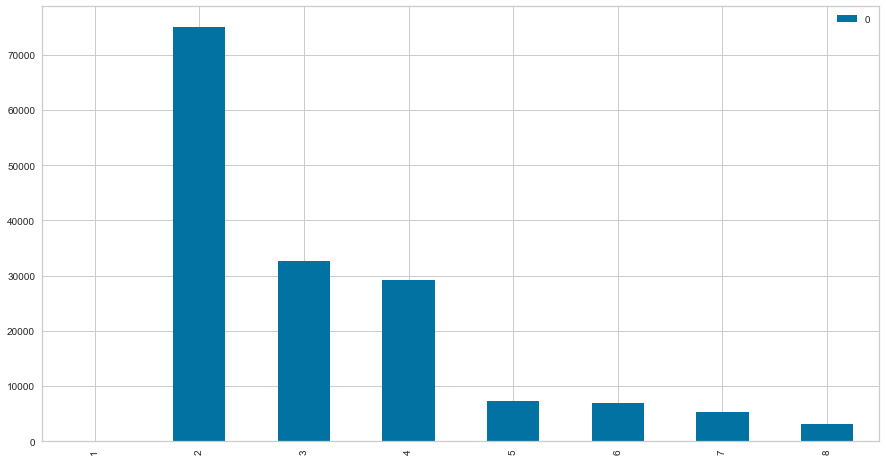

In [55]:
df_diff.plot(kind='bar',figsize=(15,8))

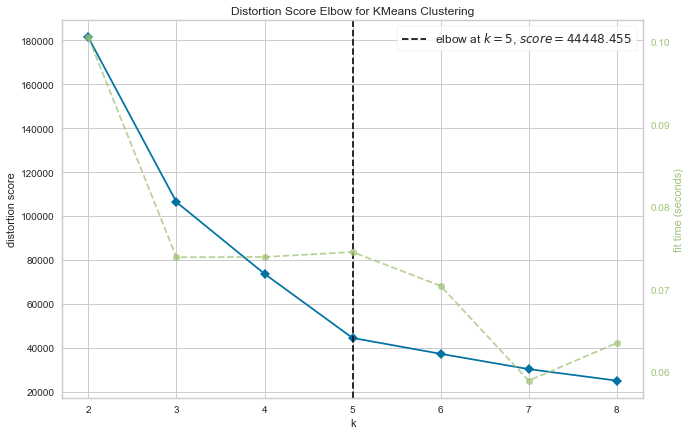

In [56]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9), size=(750,500))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [57]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


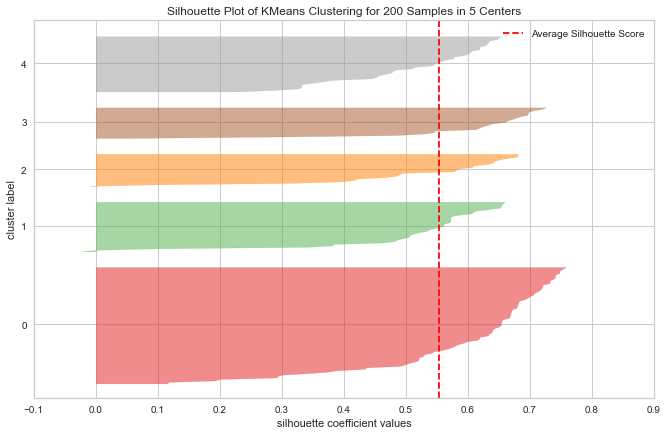

In [58]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3,size=(800,500))

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [59]:
kmeans2 = KMeans(n_clusters=5, random_state=42)

In [60]:
kmeans2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [61]:
X2["cluster_Kmeans"] = kmeans2.fit_predict(X2)

In [62]:
X2["cluster_Kmeans"].value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

In [63]:
X2

,Annual Income,Spending Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

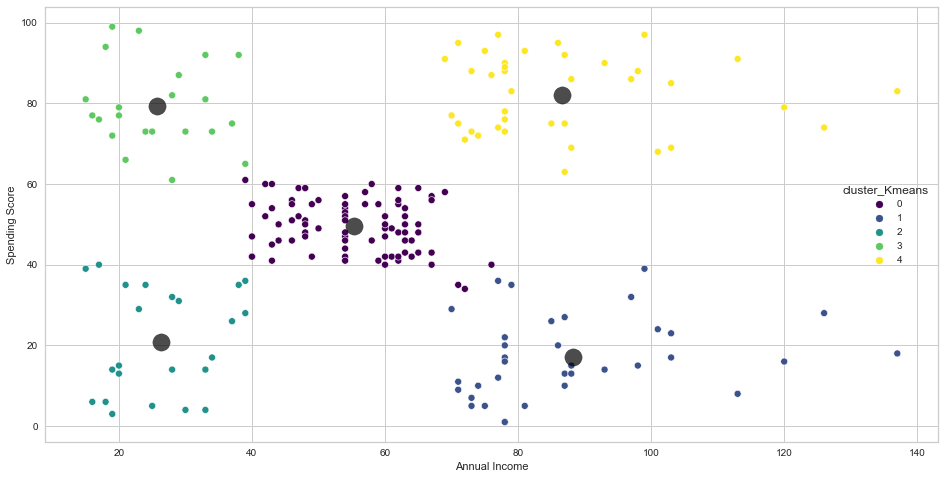

In [64]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster_Kmeans', data=X2, palette="viridis")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [65]:
from pyclustertend import hopkins

In [66]:
X1.head()

,Age,Spending Score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3


In [67]:
hopkins(X1, X1.shape[0])  

0.32024867311953814

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [69]:
hc_ward = linkage(y = X1, method = "ward")  # Datayi hangi kumeye atarsan varyans en en dusuk olacaksa o kumeye at.
hc_complete = linkage(X1, "complete")       # Kumelerdeki en uzak noktalari bul, bunlar icinde en yakin olana atama yap.
hc_average = linkage(X1, "average")         # Datanin kumenin her elemanina olan uzakliklarinin ortalamasini al, en az olan kumeye ata ata.
hc_single = linkage(X1, "single") 

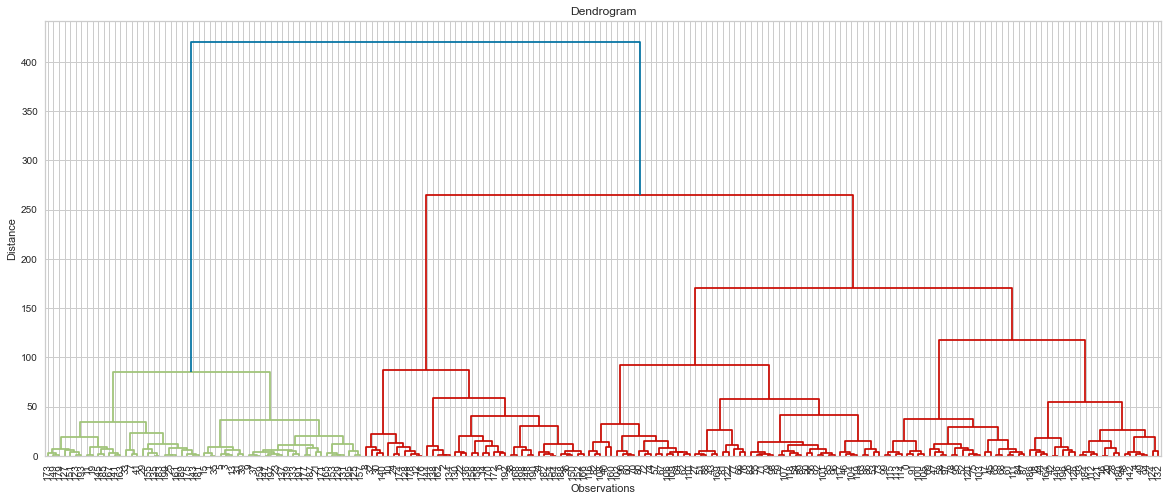

In [70]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);  

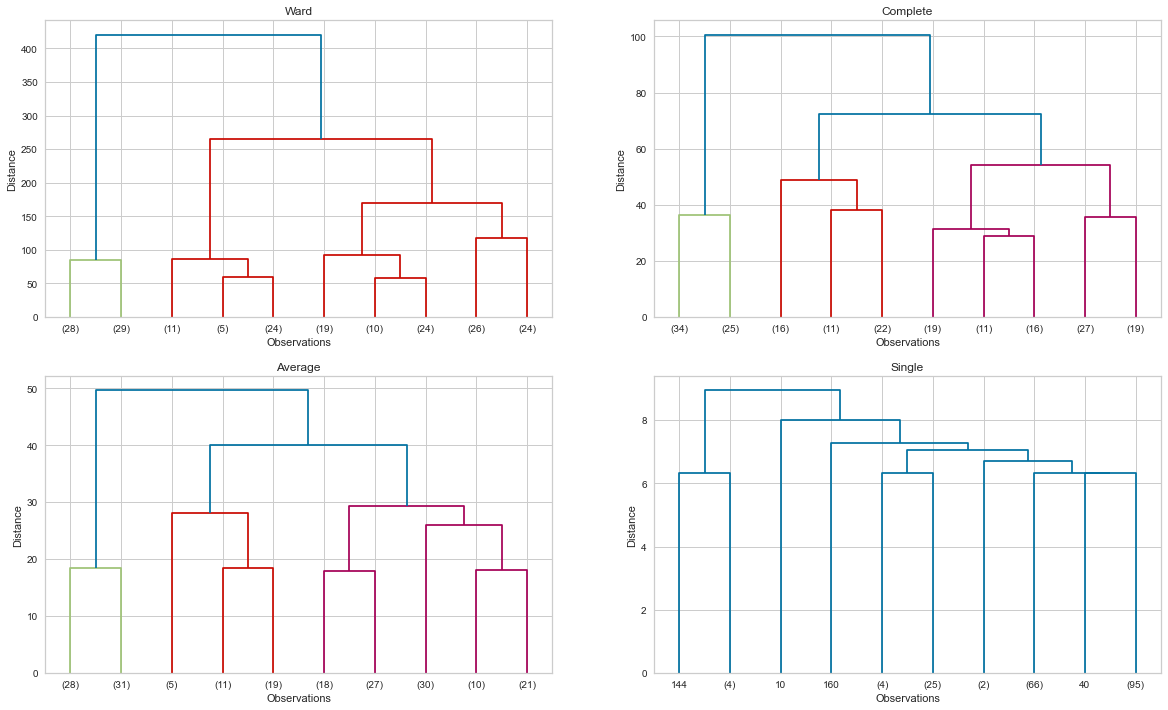

In [71]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

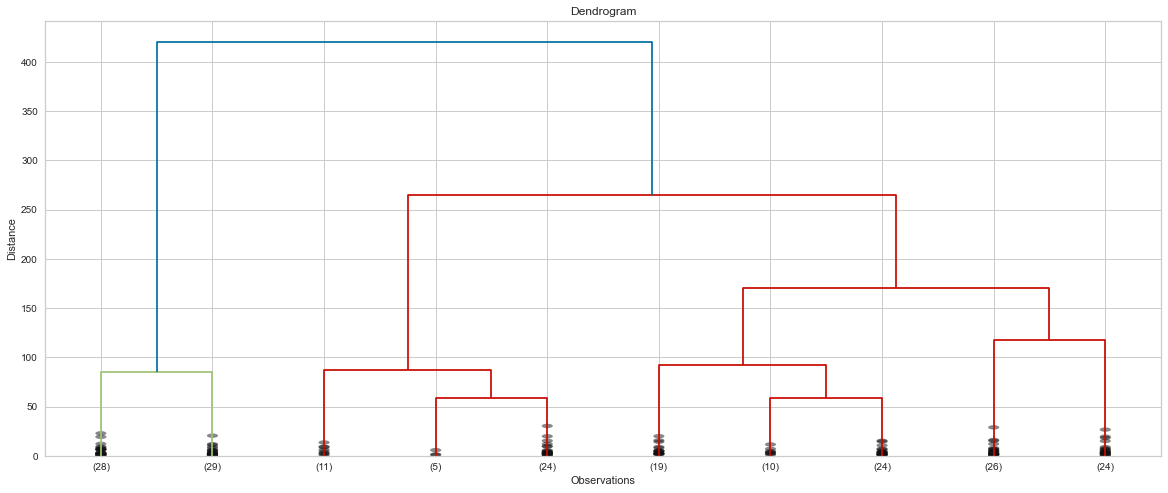

In [72]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [73]:
from sklearn.cluster import AgglomerativeClustering

In [74]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076
For n_clusters=10, the silhouette score is 0.38799839181574464


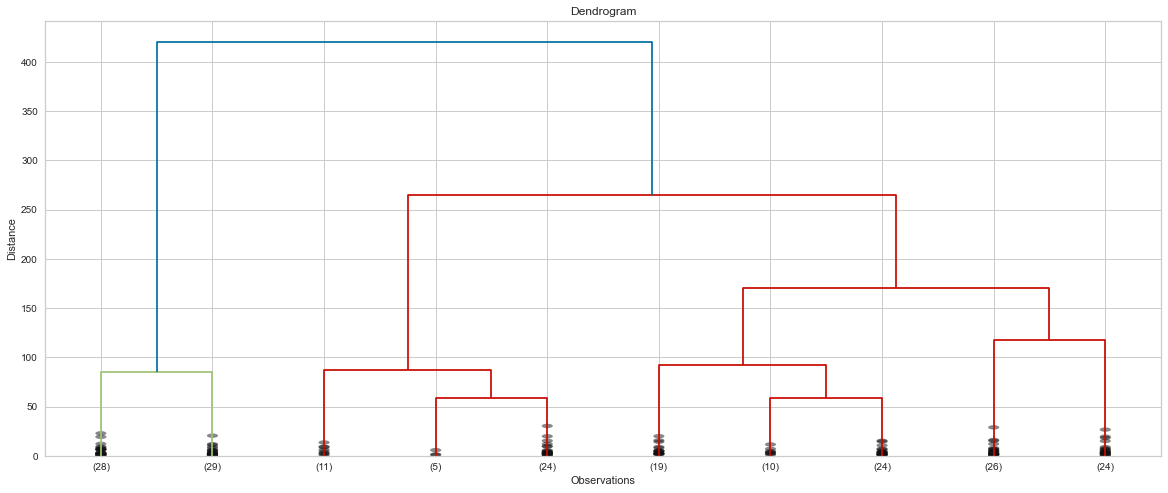

In [75]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

In [76]:
X2.head()

,Annual Income,Spending Score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [77]:
hopkins(X2, X2.shape[0])   # Kümelemeye uygun

0.2945506860338836

In [78]:
hc_ward = linkage(y = X2, method = "ward")  # Datayi hangi kumeye atarsan varyans en en dusuk olacaksa o kumeye at.
hc_complete = linkage(X2, "complete")       # Kumelerdeki en uzak noktalari bul, bunlar icinde en yakin olana atama yap.
hc_average = linkage(X2, "average")         # Datanin kumenin her elemanina olan uzakliklarinin ortalamasini al, en az olan kumeye ata ata.
hc_single = linkage(X2, "single")  

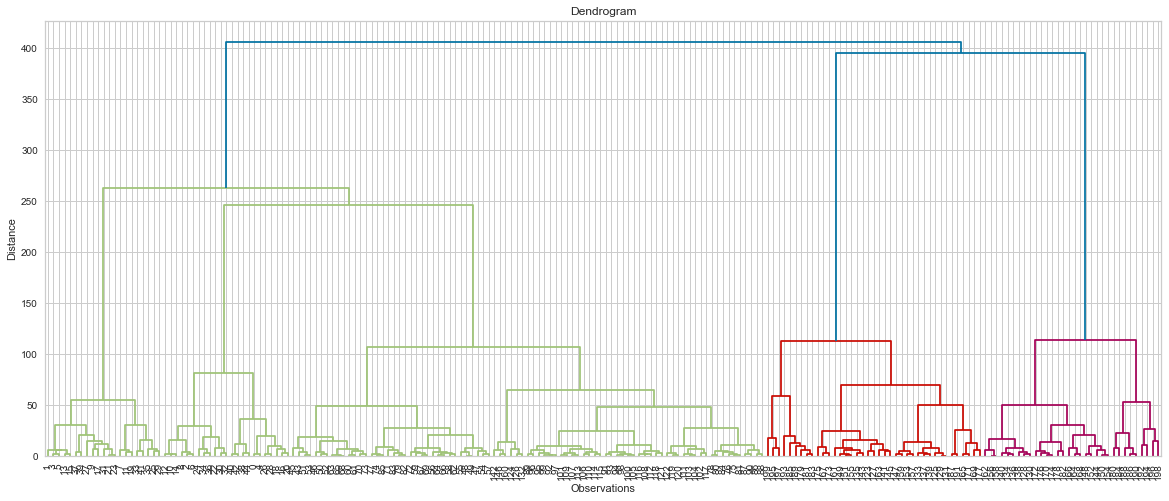

In [79]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10); 

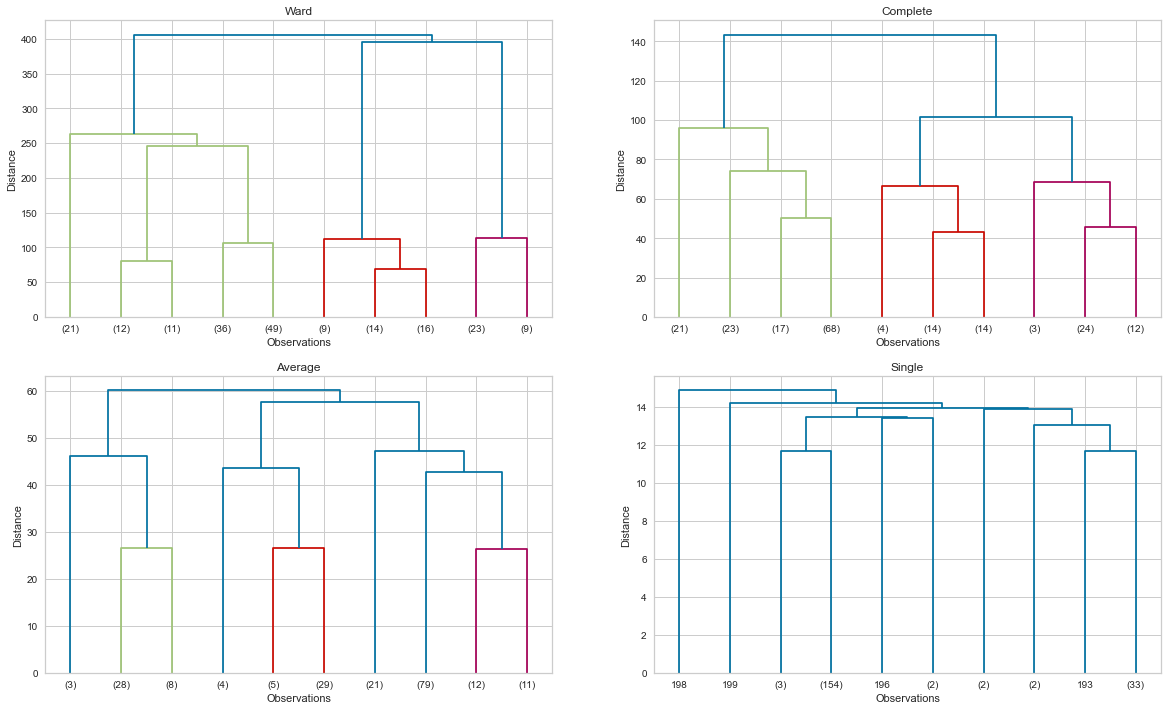

In [80]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [81]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [82]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
agg_clus = model1.fit_predict(X1)

In [83]:
X1["cluster_agg"] = agg_clus
X1.head()

,Age,Spending Score,cluster_Kmeans,cluster_agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


#### Annual Income and Spending Score- x2

In [84]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
agg_clus_2 = model2.fit_predict(X2)

In [85]:
X2["cluster_agg"] = agg_clus_2
X2.head()

,Annual Income,Spending Score,cluster_Kmeans,cluster_agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

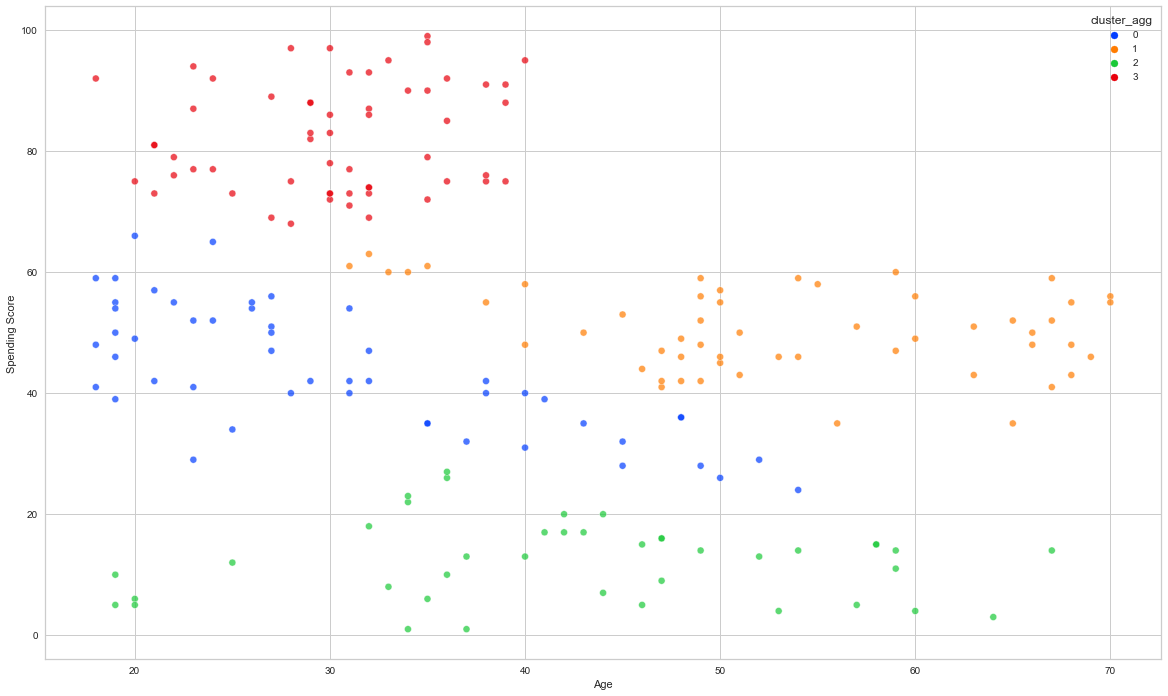

In [86]:
plt.figure(figsize = (20,12))
sns.scatterplot(x ="Age", y= "Spending Score", data=X1, hue='cluster_agg',palette="bright", alpha =0.7);

#### Annual Income and Spending Score- x2

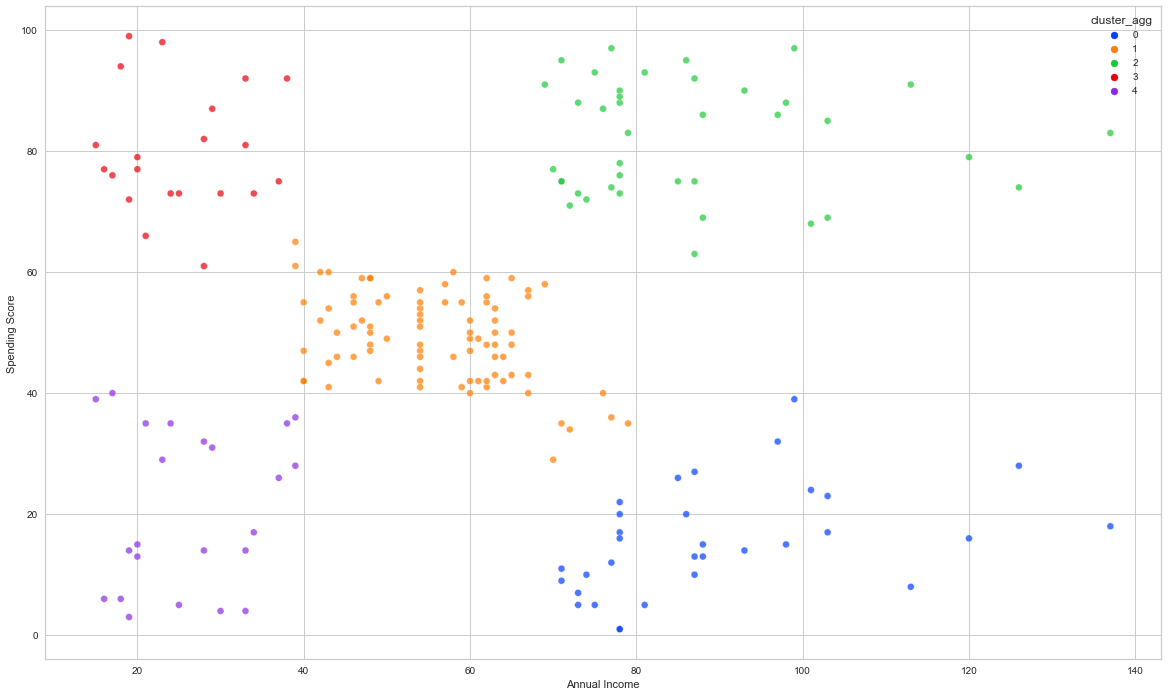

In [87]:
plt.figure(figsize = (20,12))
sns.scatterplot(x ="Annual Income", y= "Spending Score", data=X2, hue='cluster_agg',palette="bright", alpha =0.7);

#### Interpretation based on Age and Spending Score- x1

In [88]:
X1.head()

,Age,Spending Score,cluster_Kmeans,cluster_agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0


In [89]:
X1.groupby("cluster_Kmeans").describe()

Age                                                   \
                count   mean    std    min    25%    50%    75%    max   
cluster_Kmeans                                                           
0              48.000 55.708  8.558 43.000 48.750 53.500 65.000 70.000   
1              48.000 43.292 11.762 19.000 36.000 44.000 52.000 67.000   
2              57.000 30.175  5.536 18.000 27.000 30.000 35.000 40.000   
3              47.000 27.617  7.167 18.000 21.000 27.000 32.500 41.000   

               Spending Score                                                  \
                        count   mean   std    min    25%    50%    75%    max   
cluster_Kmeans                                                                  
0                      48.000 48.229 6.923 35.000 43.000 48.000 53.500 60.000   
1                      48.000 15.021 8.753  1.000  7.750 14.000 20.500 32.000   
2                      57.000 82.351 8.913 68.000 75.000 81.000 90.000 99.000   
3                      47.000 49.149 9.137 29.000 41.500 50.000 55.500 66.000   

               cluster_agg                                            
                     count  mean   std   min   25%   50%   75%   max  
cluster_Kmeans                                                        
0                   48.000 0.938 0.245 0.000 1.000 1.000 1.000 1.000  
1                   48.000 1.667 0.753 0.000 2.000 2.000 2.000 2.000  
2                   57.000 3.000 0.000 3.000 3.000 3.000 3.000 3.000  
3                   47.000 0.170 0.380 0.000 0.000 0.000 0.000 1.000

<AxesSubplot:xlabel='cluster_Kmeans', ylabel='count'>

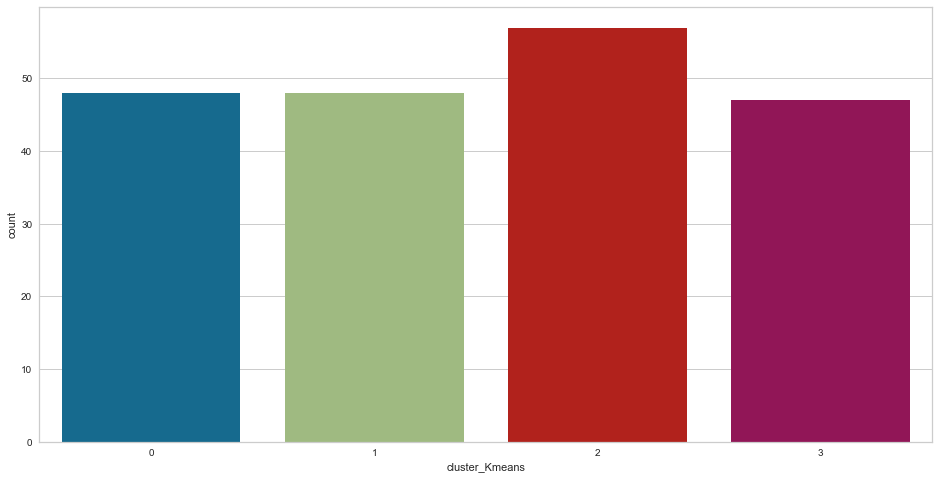

In [101]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=X1, x="cluster_Kmeans")
ax#.bar_label(ax.containers[0]);

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [91]:
X2.head()

,Annual Income,Spending Score,cluster_Kmeans,cluster_agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


In [92]:
X2.groupby("cluster_Kmeans").describe()

Annual Income                                            \
                       count   mean    std    min    25%    50%    75%   
cluster_Kmeans                                                           
0                     81.000 55.296  8.988 39.000 48.000 54.000 62.000   
1                     35.000 88.200 16.399 70.000 77.500 85.000 97.500   
2                     23.000 26.304  7.894 15.000 19.500 25.000 33.000   
3                     22.000 25.727  7.567 15.000 19.250 24.500 32.250   
4                     39.000 86.538 16.312 69.000 75.500 79.000 95.000   

                       Spending Score                                     \
                   max          count   mean    std    min    25%    50%   
cluster_Kmeans                                                             
0               76.000         81.000 49.519  6.531 34.000 44.000 50.000   
1              137.000         35.000 17.114  9.952  1.000 10.000 16.000   
2               39.000         23.000 20.913 13.017  3.000  9.500 17.000   
3               39.000         22.000 79.364 10.504 61.000 73.000 77.000   
4              137.000         39.000 82.128  9.364 63.000 74.500 83.000   

                             cluster_agg                                      \
                  75%    max       count  mean   std   min   25%   50%   75%   
cluster_Kmeans                                                                 
0              55.000 61.000      81.000 1.000 0.000 1.000 1.000 1.000 1.000   
1              23.500 39.000      35.000 0.086 0.284 0.000 0.000 0.000 0.000   
2              33.500 40.000      23.000 4.000 0.000 4.000 4.000 4.000 4.000   
3              85.750 99.000      22.000 2.909 0.426 1.000 3.000 3.000 3.000   
4              90.000 97.000      39.000 2.000 0.000 2.000 2.000 2.000 2.000   

                      
                 max  
cluster_Kmeans        
0              1.000  
1              1.000  
2              4.000  
3              3.000  
4              2.000

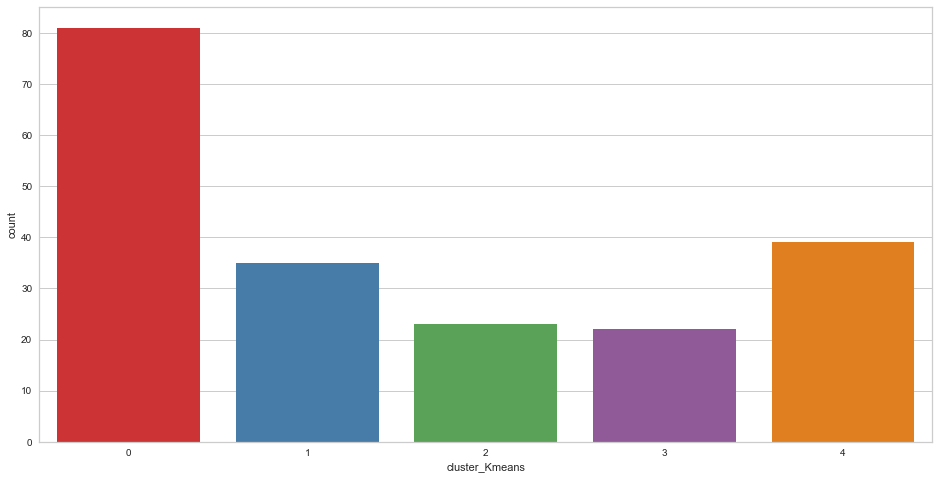

In [93]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=X2, x="cluster_Kmeans", palette="Set1")
ax;#.bar_label(ax.containers[0]);

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

In [94]:
df

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [95]:
df.groupby("Gender").describe()

Age                                                  Annual Income  \
         count   mean    std    min    25%    50%    75%    max         count   
Gender                                                                          
Female 112.000 38.098 12.644 18.000 29.000 35.000 47.500 68.000       112.000   
Male    88.000 39.807 15.515 18.000 27.750 37.000 50.500 70.000        88.000   

                                                         Spending Score  \
         mean    std    min    25%    50%    75%     max          count   
Gender                                                                    
Female 59.250 26.012 16.000 39.750 60.000 77.250 126.000        112.000   
Male   62.227 26.638 15.000 45.500 62.500 78.000 137.000         88.000   

                                                        
         mean    std   min    25%    50%    75%    max  
Gender                                                  
Female 51.527 24.115 5.000 35.000 50.000 73.000 99.000  
Male   48.511 27.897 1.000 24.500 50.000 70.000 97.000

In [96]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df.head()

,Gender,Age,Annual Income,Spending Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


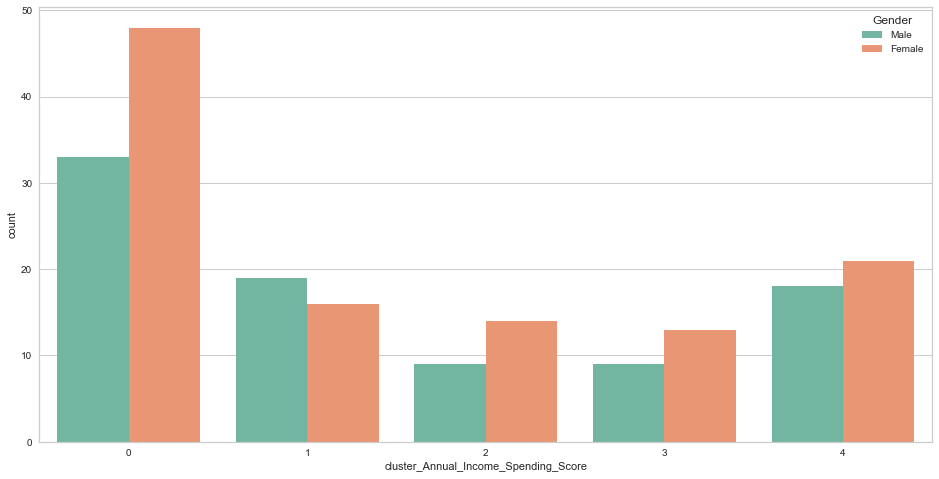

In [97]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df,x = "cluster_Annual_Income_Spending_Score", hue ="Gender",palette="Set2")
for container in ax.containers:
    ax#.bar_label(container)

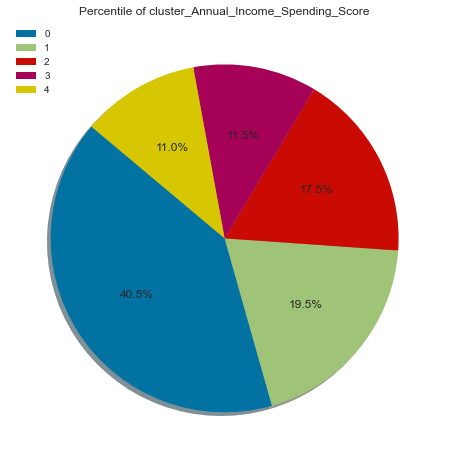

In [98]:
plt.figure(figsize=(10,8))
explode = [0,0,0,0,0]
plt.pie(df['cluster_Annual_Income_Spending_Score'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140);
plt.title("Percentile of cluster_Annual_Income_Spending_Score")
plt.legend(labels=[0,1,2,3,4]);

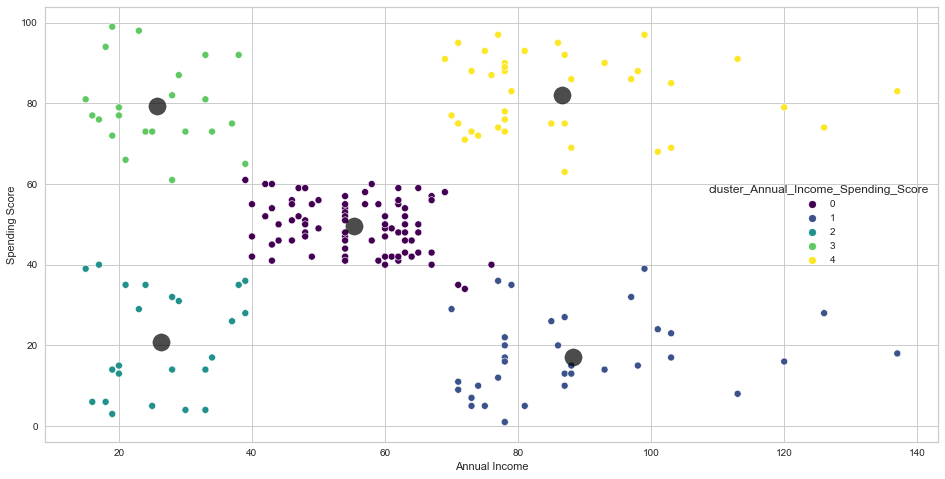

In [99]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster_Annual_Income_Spending_Score', data=df, palette="viridis")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7);

In [100]:
df.groupby("cluster_Annual_Income_Spending_Score").mean()

,Age,Annual Income,Spending Score
cluster_Annual_Income_Spending_Score,,,
0,42.716,55.296,49.519
1,41.114,88.200,17.114
2,45.217,26.304,20.913
3,25.273,25.727,79.364
4,32.692,86.538,82.128


**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___